In [9]:
%matplotlib inline

In [12]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import seaborn as sns
import plotly
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy import stats

sns.set_style('darkgrid')

## Inverse Gamma

In [15]:
invgammap = lambda sigma0_2, L: stats.invgamma(a = L/2, loc = 0, scale = sigma0_2*L/2)

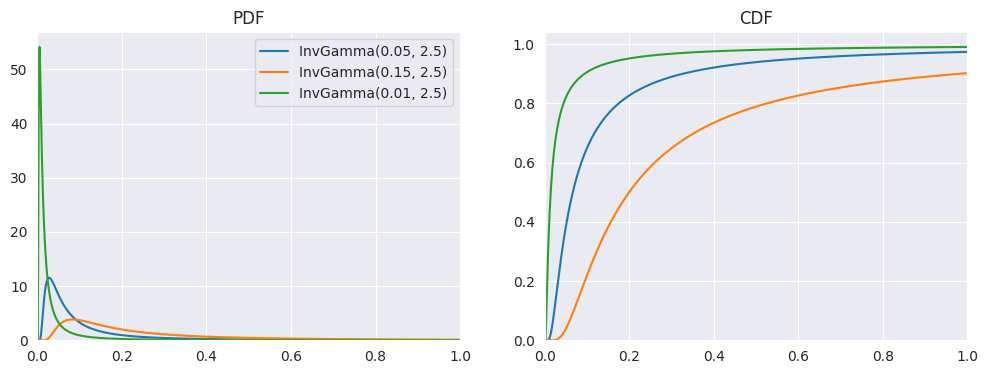

In [3]:

dists = {
    # 'first': stats.invgamma(a = 2.0, loc = 0, scale = 1e-2),
    # 'first2': stats.invgamma(a = 2.0, loc = 0, scale = 1e-2),
    # f'InvGamma({1e-2}, {4.0})': invgammap(1e-2, 4.0),
    # f'InvGamma({1e-2/2}, {4.0})': invgammap(1e-2/2, 4.0),
    # f'InvGamma({1e-2/2}, {2.0})': invgammap(1e-2/2, 2.0),
    # f'InvGamma({1e-2/2}, {1.0})': invgammap(1e-2/2, 1.0),
    # f'InvGamma({0.08}, {4.50})': invgammap(0.08, 4.50), 
    f'InvGamma({0.05}, {2.5})': invgammap(0.05, 2.5),
    f'InvGamma({0.15}, {2.5})': invgammap(0.15, 2.5),
    f'InvGamma({0.01}, {2.5})': invgammap(0.01, 2.0),
}

s = np.linspace(0, 1.0, 1000)

fig, axs = plt.subplots(1,2, figsize=(12,4))
for k,d in dists.items():
    pdf = d.pdf(s)
    cdf = d.cdf(s)
    # pdf /= pdf.max()
    axs[0].plot(s, pdf, label=k )
    axs[1].plot(s, cdf, label=k )
axs[0].set_title('PDF')
axs[0].set_ylim([0,axs[0].get_ylim()[1]])
axs[0].set_xlim([s.min()-0.0,s.max()])
axs[1].set_title('CDF')
axs[1].set_xlim([s.min(),s.max()])
axs[1].set_ylim([0,axs[1].get_ylim()[1]])
plt.grid(True)
axs[0].legend(loc='upper right')
plt.show()

## Gamma

In [4]:
from torch.distributions.gamma import Gamma
from scipy.stats import gamma

print(np.exp(Gamma(3.,15.).log_prob(0.1).numpy()))
print(gamma(3.,0,1./15.).pdf(0.1))

3.7653236
3.765321452504753


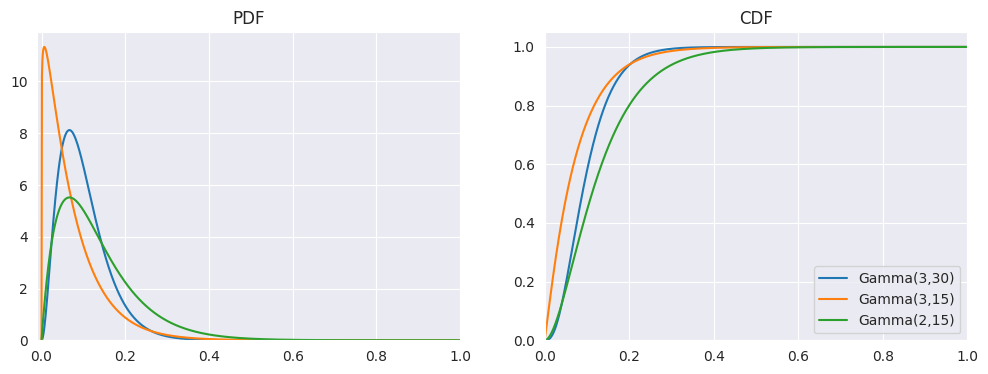

In [5]:
dists = {
    'Gamma(3,30)': stats.gamma(3.,0., 1/30.), 
    'Gamma(3,15)': stats.gamma(1.1,0., 1/15.), 
    'Gamma(2,15)': stats.gamma(2.0, 0, 1/15.),
    # 'learned': stats.gamma(5., 0,  1/1.), 
    # 'learned2': stats.gamma(0.5, 0,  1/0.1), 
}

s = np.linspace(0, 1.0, 1000)

fig, axs = plt.subplots(1,2, figsize=(12,4))
for k,d in dists.items():
    pdf = d.pdf(s)
    cdf = d.cdf(s)
    # pdf /= pdf.max()
    axs[0].plot(s, pdf, label=k )
    axs[1].plot(s, cdf, label=k )
axs[0].set_title('PDF')
axs[0].set_ylim([0,axs[0].get_ylim()[1]])
axs[0].set_xlim([s.min()-0.01,s.max()])
axs[1].set_title('CDF')
axs[1].set_xlim([s.min(),s.max()])
axs[1].set_ylim([0,axs[1].get_ylim()[1]])
plt.grid(True)
plt.legend()
plt.show()

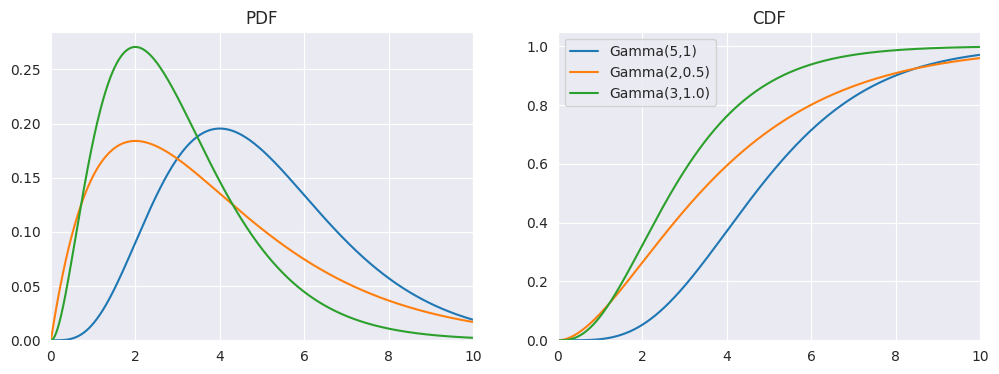

In [6]:
dists = {
    # 'prior': stats.gamma(3.,0., 1/30.), 
    'Gamma(5,1)': stats.gamma(5., 0,  1/1.), 
    # 'Gamma(0.5,0.1)': stats.gamma(0.5, 0,  1/0.1), 
    'Gamma(2,0.5)': stats.gamma(2., 0,  1/0.5), 
    'Gamma(3,1.0)': stats.gamma(3., 0,  1/1.0), 
}

s = np.linspace(0, 10.0, 1000)

fig, axs = plt.subplots(1,2, figsize=(12,4))
for k,d in dists.items():
    pdf = d.pdf(s)
    cdf = d.cdf(s)
    axs[0].plot(s, pdf, label=k )
    axs[1].plot(s, cdf, label=k )
axs[0].set_title('PDF')
axs[0].set_ylim([0,axs[0].get_ylim()[1]])
axs[0].set_xlim([s.min()-0.01,s.max()])
axs[1].set_title('CDF')
axs[1].set_xlim([s.min(),s.max()])
axs[1].set_ylim([0,axs[1].get_ylim()[1]])
plt.grid(True)
plt.legend()
plt.show()

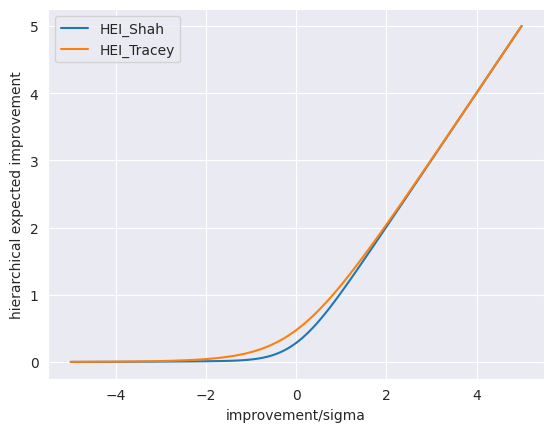

In [8]:
nu = 5
sigma=1.
standard_t = stats.t(df=nu)
epsilon_best = np.linspace(-1,1,100) * 5
sigma = 1.

HEI1 = sigma * epsilon_best * standard_t.cdf(x=epsilon_best) + sigma * (1 + (epsilon_best**2-1)/(nu - 1)) * standard_t.pdf(x=epsilon_best)
HEI2 = sigma * epsilon_best * standard_t.cdf(x=epsilon_best) + sigma * (nu + epsilon_best**2)/(nu - 1) * standard_t.pdf(x=epsilon_best)

plt.figure()
plt.plot(epsilon_best, HEI1, label='HEI_Shah')
plt.plot(epsilon_best, HEI2, label='HEI_Tracey')
plt.xlabel('improvement/sigma')
plt.ylabel('hierarchical expected improvement')
plt.grid(True)
plt.legend()
plt.show()